# Lab Notes

[Decision Tree discussion]

**Greedy Algorithm** - Considers best solution to immediate situation, regardless of future steps.



# Logistic Regression

In [3]:
import math
import random

random.seed(0)


def printRounded(my_list):
    print("[", end="")
    for i in range(len(my_list) - 1):
        print(str(round(my_list[i], 7)), end=", ")
    print(str(round(my_list[-1], 7)), end="]\n")


class LogisticRegression:
    def __init__(self, alpha=0.15):  # Initialise our values
        self.alpha = alpha  # The learning rate
        self.beta = [0.1, 0.1, 0.1]  # Our coefficients

    def train(self, dataset, labels, n=200):  # Find useful coefficients
        dataset_tmp, labels_tmp = dataset.copy(), labels.copy()  # So input variables are not affected
        mse_list = []  # To be populated & returned at end
        for epoch in range(n):  # For each epoch
            rand_state = random.getstate()  # Prepare to rollback random state
            random.shuffle(dataset_tmp)  # Shuffle the data as required
            random.setstate(rand_state)  # Rollback random state
            random.shuffle(labels_tmp)  # Shuffle the labels the same way as the data
            epoch_mse = 0  # Initialise our MSE at 0
            for i in range(len(dataset_tmp)):  # Iterate through observations
                tmp_x = [1] + dataset_tmp[i]  # Account for our intercept
                sigma = self._sigma(dataset_tmp[i])  # Find predicted probability of label 1
                for j in range(len(self.beta)):  # Iterate through, and update, coefficients
                    self.beta[j] -= self.alpha * (sigma - labels_tmp[i]) * sigma * (1 - sigma) * tmp_x[j]
                    sigma = self._sigma(dataset_tmp[i])  # Update sigma
            for i in range(len(dataset_tmp)):  # Construct the epoch's MSE
                epoch_mse += ((self._sigma(dataset_tmp[i]) - labels_tmp[i]) ** 2) / len(dataset_tmp)
            mse_list.append(epoch_mse)  # Add the MSE to our list
        return mse_list

    def classify(self, dataset, threshold):
        preds = [0 for _ in dataset]  # Predict label 0 if the condition is not met
        for i in range(len(dataset)):
            if self._sigma(dataset[i]) > threshold:  # If P(label 1) exceeds the threshold, predict label 1 instead
                preds[i] = 1
        return preds

    def _sigma(self, x):  # Find the probability of label 1 for observation x given our coefficients (beta)
        tmp_x = [1] + x
        t = 0
        for i in range(len(tmp_x)):
            t += self.beta[i] * tmp_x[i]
        return 1 / (1 + math.exp(-t))

[0, 0, 1, 1, 1, 1, 1, 1, 1]
[0.228085, 0.2215818, 0.2164686, 0.2109587, 0.2070173, 0.2010904, 0.1964541, 0.1914877, 0.1871268, 0.1831346, 0.1786313, 0.1750682, 0.1722096, 0.1681779, 0.1651492, 0.1611823, 0.1583065, 0.1552173, 0.1553858, 0.1514838]


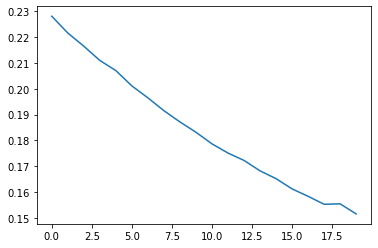

In [5]:
import matplotlib.pyplot as plt
dataset = [[0, 0], [1, 0], [2, 1], [1, 2], [3, 1], [4, 1], [5, 2], [3, 3], [2, 5]]
labels = [0, 0, 0, 0, 0, 1, 1, 1, 1]
random.seed(0)

lr = LogisticRegression()

MSEList = lr.train(dataset, labels, 20)

predictedLabels = lr.classify(dataset, 0.5)
print(predictedLabels)
printRounded(MSEList)
plt.plot(MSEList)
plt.show()

In [ ]:
import matplotlib.pyplot as plt